In [65]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
import numpy as np
from sklearn import metrics

In [46]:
df = pd.read_csv("europe_clean.csv")

In [47]:
df.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,hospital_beds_per_thousand,life_expectancy,human_development_index,date_int,new_cases_smooth_per_pop_den,num_of_days_data_avail
0,ALB,Europe,Albania,2020-03-14,38,5,5.429,1.0,0.0,0.143,...,304.19501,10.08,7.1,51.200001,2.89,78.57,0.795,14mar2020,0.051768,355
1,ALB,Europe,Albania,2020-03-15,42,4,6.000,1.0,0.0,0.143,...,304.19501,10.08,7.1,51.200001,2.89,78.57,0.795,15mar2020,0.057213,355
2,ALB,Europe,Albania,2020-03-16,51,9,7.000,1.0,0.0,0.143,...,304.19501,10.08,7.1,51.200001,2.89,78.57,0.795,16mar2020,0.066749,355
3,ALB,Europe,Albania,2020-03-17,55,4,6.429,1.0,0.0,0.143,...,304.19501,10.08,7.1,51.200001,2.89,78.57,0.795,17mar2020,0.061304,355
4,ALB,Europe,Albania,2020-03-18,59,4,6.714,2.0,1.0,0.143,...,304.19501,10.08,7.1,51.200001,2.89,78.57,0.795,18mar2020,0.064022,355


In [20]:
# df["year"] = df["date"]
# df["month"] = df["date"]
# df["day"] = df["date"]

In [ ]:
# for index, row in df.iterrows():
#     df["year"][index] = df["date"].str.split("-")[index][0]
#     df["month"] = df["date"].str.split("-")[1]
#     df["day"] = df["date"].str.split("-")[2]

In [48]:
def split_date(date):
    year, month, day = date.split('-')

    return pd.Series({
        'year': year,
        'month': month,
        'day': day
    })

# df_new has the new columns
df_new = df['date'].apply(split_date)

# append the columns to the original dataframe
df = pd.concat([df, df_new],axis=1)

In [49]:
df[["year", "month", "day"]]

,year,month,day
0,2020,03,14
1,2020,03,15
2,2020,03,16
3,2020,03,17
4,2020,03,18
...,...,...,...
10818,2021,02,27
10819,2021,02,28
10820,2021,03,01
10821,2021,03,02


In [50]:
df.columns

Index(['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases',
       'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients',
       'icu_patients_per_million', 'hosp_patients',
       'hosp_patients_per_million', 'weekly_icu_admissions',
       'weekly_icu_admissions_per_millio', 'weekly_hosp_admissions',
       'weekly_hosp_admissions_per_milli', 'new_tests', 'total_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated', 'new_vaccinations',
       'new_vaccinations_smoothed', 'total_vaccinations_per_hundre

In [51]:
df["new_deaths_smoothed_per_million"]

0        0.050
1        0.050
2        0.050
3        0.050
4        0.050
         ...  
10818    4.937
10819    4.783
10820    4.628
10821    4.196
10822    4.289
Name: new_deaths_smoothed_per_million, Length: 10823, dtype: float64

In [ ]:
# data_X.dropna()

In [38]:
def clean_dataset(df):
    assert isinstance(df, pd.DataFrame), "df needs to be a pd.DataFrame"
    df.dropna(inplace=True)
    indices_to_keep = ~df.isin([np.nan, np.inf, -np.inf]).any(1)
    return df[indices_to_keep].astype(np.float64)

In [54]:
relevant_df = df[['year', 'month', 'day', 'median_age', 'stringency_index', 'female_smokers', 'male_smokers', 'population_density', 
             'hospital_beds_per_thousand', 'human_development_index', 'new_cases_smoothed_per_million']]

In [55]:
df = clean_dataset(relevant_df)

/home/shinjini/.local/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [56]:
data_X = df[['year', 'month', 'day', 'median_age', 'stringency_index', 'female_smokers', 'male_smokers', 'population_density', 
             'hospital_beds_per_thousand', 'human_development_index']]
data_Y = df[['new_cases_smoothed_per_million']]

In [57]:
# X_train = X_train.reset_index()
# X_test = X_test.reset_index()
# y_train = y_train.reset_index()
# y_test = y_test.reset_index()

In [58]:
X_train, X_test, y_train, y_test = train_test_split(data_X, data_Y, test_size=0.3)

In [59]:
# X_train = clean_dataset(X_train)
# X_test = clean_dataset(X_test)
# y_train = clean_dataset(y_train)
# y_test = clean_dataset(y_test)

In [60]:
clf=RandomForestRegressor(n_estimators=100)
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)

/home/shinjini/.local/lib/python3.6/site-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


In [62]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 95.2432344000002
Mean Squared Error: 9574.073413343194
Root Mean Squared Error: 97.84719420271178


In [89]:
estimators_to_rmse = {}
# estimators = [5, 10, 20, 50, 100, 150, 200, 260, 275, 300, 400, 500]
estimators = list(range(5, 500, 10))
for n_est in estimators:
    clf=RandomForestRegressor(n_estimators=n_est)
    clf.fit(X_train,y_train)
    y_pred=clf.predict(X_test)
    rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
    estimators_to_rmse[n_est] = rmse

/home/shinjini/.local/lib/python3.6/site-packages/ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  
/home/shinjini/.local/lib/python3.6/site-packages/ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  
/home/shinjini/.local/lib/python3.6/site-packages/ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  
/home/shinjini/.local/lib/python3.6/site-packages/ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  
/home/shinjini/.local/lib/python3.6/site-packages/ipykernel_launcher

/home/shinjini/.local/lib/python3.6/site-packages/ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  
/home/shinjini/.local/lib/python3.6/site-packages/ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  
/home/shinjini/.local/lib/python3.6/site-packages/ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  
/home/shinjini/.local/lib/python3.6/site-packages/ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  
/home/shinjini/.local/lib/python3.6/site-packages/ipykernel_launcher

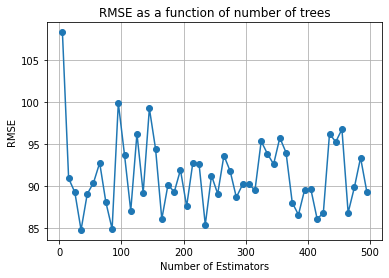

In [90]:
fig, ax = plt.subplots()

ax.plot(estimators, [estimators_to_rmse[e] for e in estimators], marker='o')
ax.set(xlabel='Number of Estimators', ylabel='RMSE',
       title='RMSE as a function of number of trees')
ax.grid()

fig.savefig("n_est_vs_rmse.png")
plt.show()